In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
# # Mount Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# # Verify the file path
# import os
# file_path = '/content/drive/MyDrive/6300/gold-sentiments.csv'
# if os.path.exists(file_path):
#     print(f"File found at: {file_path}")
# else:
#     print(f"File not found at: {file_path}")
#     print("Please double-check the file path and ensure it exists.")

# # Now read the CSV file
# sentiments_df = pd.read_csv(file_path)
# goldstockv1 = pd.read_csv('/content/drive/MyDrive/6300/goldstock v1.csv')
# goldstockv2 = pd.read_csv('/content/drive/MyDrive/6300/goldstock v2.csv')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
sentiments_df = pd.read_csv('/content/drive/MyDrive/6300/gold-sentiments.csv')
goldstockv1 = pd.read_csv('/content/drive/MyDrive/6300/goldstock v1.csv')
goldstockv2 = pd.read_csv('/content/drive/MyDrive/6300/goldstock v2.csv')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
sentiments_df.head()

# Preprocessing

In [ ]:
sentiments_df['Dates'] = pd.to_datetime(sentiments_df['Dates'], format='%d-%m-%Y', errors='coerce')

# Find the minimum and maximum dates
min_date = sentiments_df['Dates'].min()
max_date = sentiments_df['Dates'].max()

# Print the date range
print(f"Date range: {min_date.date()} to {max_date.date()}")

Date range: 2000-02-15 to 2019-02-01


In [ ]:
goldstockv1.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [ ]:
goldstockv1['Date'] = pd.to_datetime(goldstockv1['Date'])

# Find the minimum and maximum dates
min_date = goldstockv1['Date'].min()
max_date = goldstockv1['Date'].max()

# Print the date range
print(f"The date range is from {min_date} to {max_date}")


The date range is from 2014-01-22 00:00:00 to 2024-01-19 00:00:00


In [ ]:
goldstockv2 = goldstockv2.rename(columns={'Close/Last': 'Close'})

goldstockv2.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-07-03,2369.4,185930.0,2338.6,2374.5,2335.7
1,1,2024-07-02,2333.4,146568.0,2341.6,2346.1,2327.4
2,2,2024-07-01,2338.9,136861.0,2336.2,2348.8,2328.2
3,3,2024-06-28,2339.6,131191.0,2338.6,2350.6,2329.7
4,4,2024-06-27,2336.6,135784.0,2309.4,2342.0,2306.8


In [ ]:
goldstockv2['Date'] = pd.to_datetime(goldstockv2['Date'])

# Find the minimum and maximum dates
min_date = goldstockv2['Date'].min()
max_date = goldstockv2['Date'].max()

# Print the date range
print(f"The date range is from {min_date.date()} to {max_date.date()}")


The date range is from 2014-07-07 to 2024-07-03


# Merging datasets

In [ ]:
goldstockv2['Date'] = pd.to_datetime(goldstockv2['Date'])

sentiments_df['Dates'] = pd.to_datetime(sentiments_df['Dates'], infer_datetime_format=True, errors='coerce')

sentiments_df = sentiments_df[['Dates', 'News', 'Price Sentiment']]

sentiments_df = sentiments_df.rename(columns={'Dates': 'Date'})

merged_df = pd.merge(goldstockv2, sentiments_df, on='Date', how='inner')

merged_df

<ipython-input-14-07713899444b>:3: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  sentiments_df['Dates'] = pd.to_datetime(sentiments_df['Dates'], infer_datetime_format=True, errors='coerce')


,Unnamed: 0,Date,Close,Volume,Open,High,Low,News,Price Sentiment
0,1363,2019-02-01,1322.1,192924.0,1326.0,1328.2,1320.6,Gold rates,none
1,1364,2019-01-31,1325.2,215552.0,1325.4,1331.1,1322.2,India's 2019 gold demand forecast at 750-850 T...,none
2,1364,2019-01-31,1325.2,215552.0,1325.4,1331.1,1322.2,"Gold slips Rs 70 to Rs 34,000/10gm on muted de...",negative
3,1365,2019-01-30,1315.5,262539.0,1317.0,1328.6,1313.5,Gold rises for 4th day in a row,positive
4,1367,2019-01-28,1309.3,122869.0,1308.5,1309.8,1302.7,"Wedding buzz keeps gold firm at Rs 33,650",neutral
...,...,...,...,...,...,...,...,...,...
5099,2527,2014-07-08,1316.5,126706.0,1320.8,1325.7,1314.3,Gold prices gain in Asia ahead of Fed minutes ...,positive
5100,2527,2014-07-08,1316.5,126706.0,1320.8,1325.7,1314.3,gold down third session to a more than 2-week low,negative
5101,2528,2014-07-07,1317.0,79110.0,1321.4,1321.7,1312.1,gold futures settle at a more than one-week low,negative
5102,2528,2014-07-07,1317.0,79110.0,1321.4,1321.7,1312.1,gold dips on u.s. rate-hike uncertainty,negative


In [ ]:
print(f"Minimum Date: {merged_df['Date'].min()}")
print(f"Maximum Date: {merged_df['Date'].max()}")


Minimum Date: 2014-07-07 00:00:00
Maximum Date: 2019-02-01 00:00:00


In [ ]:
# Count the number of rows for each date
date_counts = merged_df.groupby('Date').size().reset_index(name='Row_Count')

# Display the date and corresponding row counts
print("Number of rows for each date:")
print(date_counts)

# Calculate the number of unique dates
num_unique_dates = merged_df['Date'].nunique()

# Print the number of unique dates
print("\nNumber of unique dates:", num_unique_dates)


Number of rows for each date:
           Date  Row_Count
0    2014-07-07          3
1    2014-07-08          2
2    2014-07-09          4
3    2014-07-10          4
4    2014-07-11          2
...         ...        ...
1067 2019-01-25          1
1068 2019-01-28          1
1069 2019-01-30          1
1070 2019-01-31          2
1071 2019-02-01          1

[1072 rows x 2 columns]

Number of unique dates: 1072


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5104 entries, 0 to 5103
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Unnamed: 0       5104 non-null   int64         
 1   Date             5104 non-null   datetime64[ns]
 2   Close            5104 non-null   float64       
 3   Volume           5104 non-null   float64       
 4   Open             5104 non-null   float64       
 5   High             5104 non-null   float64       
 6   Low              5104 non-null   float64       
 7   News             5104 non-null   object        
 8   Price Sentiment  5104 non-null   object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(2)
memory usage: 359.0+ KB


In [ ]:
merged_df.describe()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
count,5104.000000,5104,5104.000000,5104.000000,5104.000000,5104.000000,5104.000000
mean,1830.108738,2017-03-26 19:57:05.078370048,1254.475294,214864.141850,1254.368456,1261.907210,1247.091007
min,1363.000000,2014-07-07 00:00:00,1049.600000,1.000000,1051.500000,1062.700000,1046.800000
25%,1639.750000,2016-08-30 00:00:00,1216.850000,148496.000000,1216.400000,1224.600000,1208.200000
50%,1785.000000,2017-05-31 00:00:00,1261.400000,211187.000000,1261.500000,1269.600000,1255.150000
75%,1973.000000,2017-12-26 06:00:00,1297.300000,268970.000000,1297.200000,1305.000000,1291.200000
max,2528.000000,2019-02-01 00:00:00,1372.600000,783657.000000,1370.500000,1377.500000,1360.600000
std,279.738905,NaN,62.014011,98612.006961,62.110742,61.933801,62.043667


In [ ]:
merged_df.isnull().sum()

,0
Unnamed: 0,0
Date,0
Close,0
Volume,0
Open,0
High,0
Low,0
News,0
Price Sentiment,0


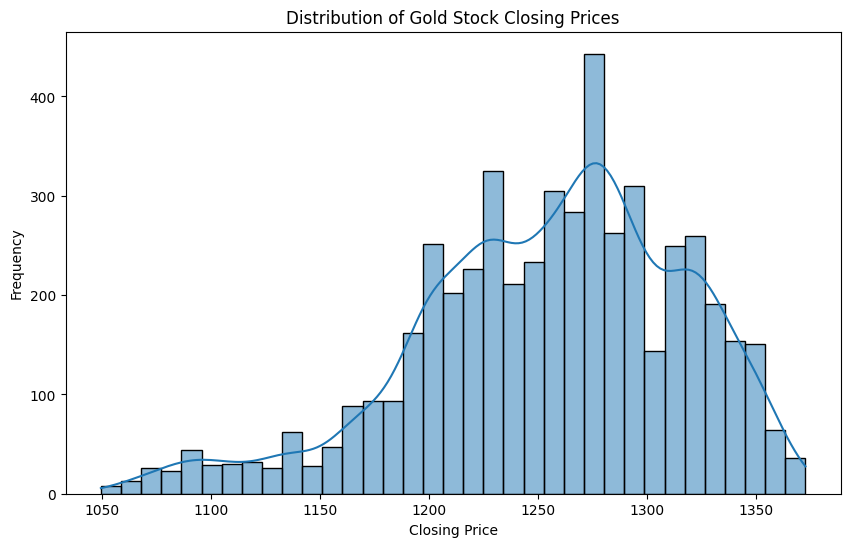

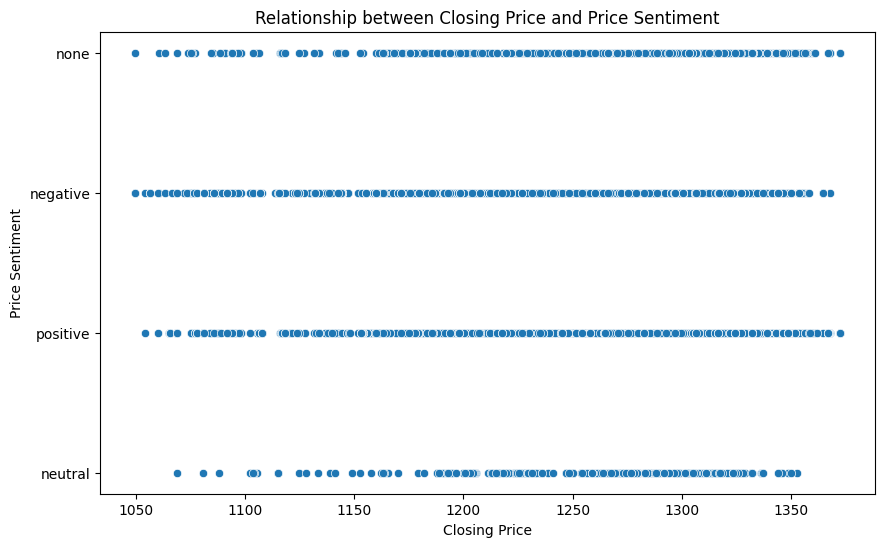

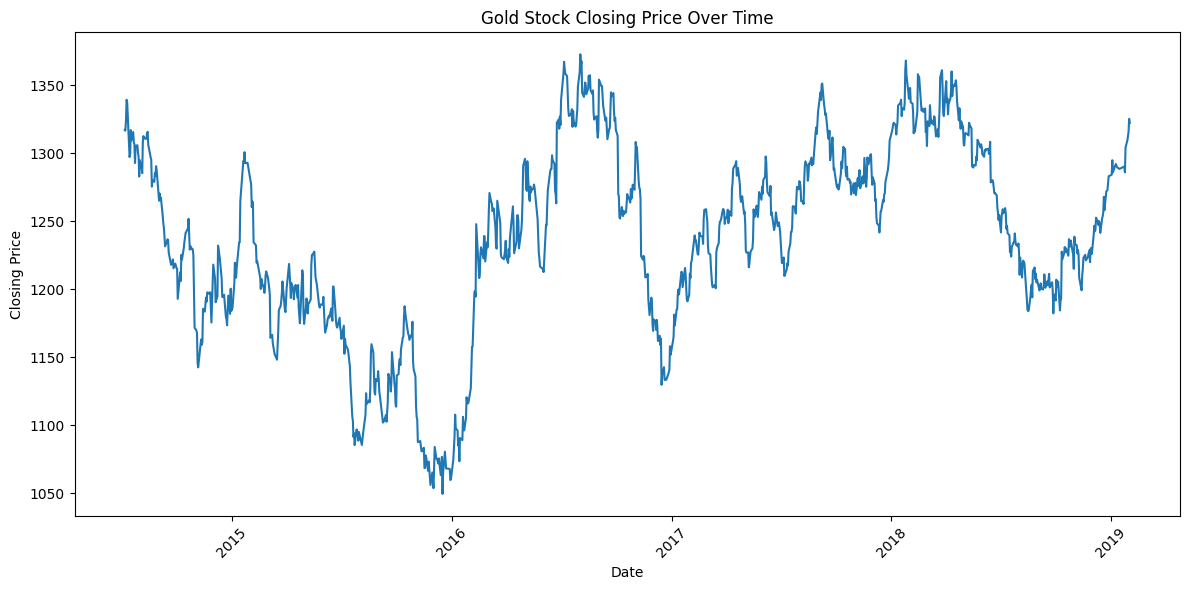

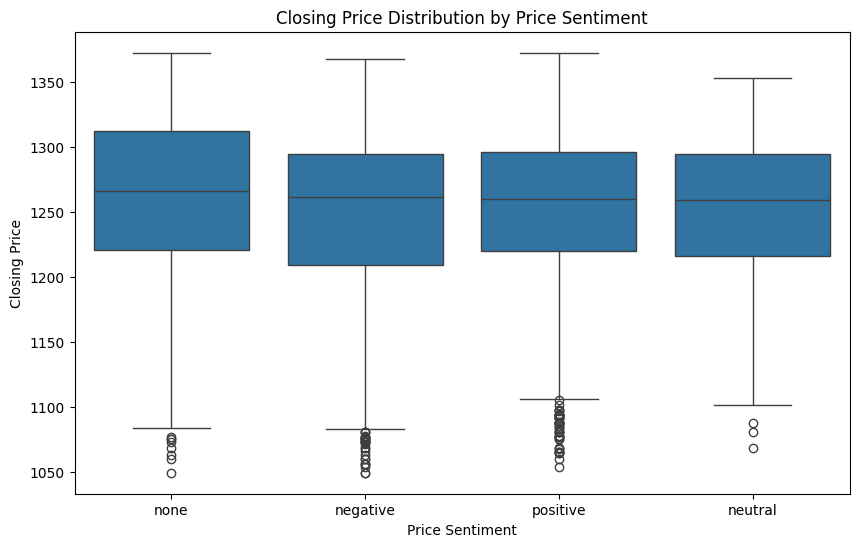

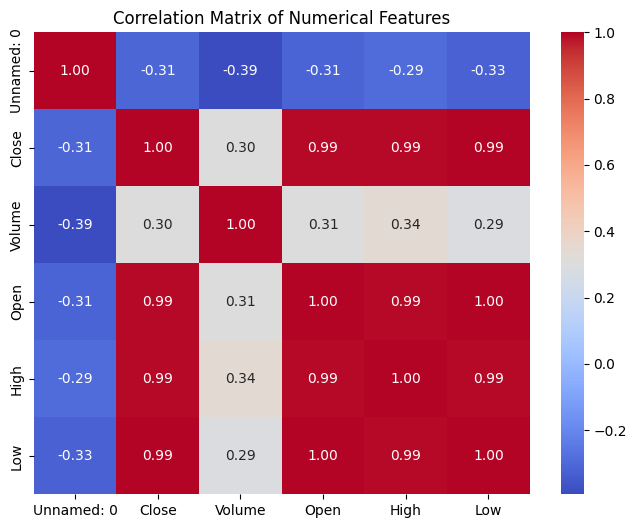

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the 'Close' price
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['Close'], kde=True)
plt.title('Distribution of Gold Stock Closing Prices')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.show()

# Plot the relationship between 'Close' price and 'Price Sentiment'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Close', y='Price Sentiment', data=merged_df)
plt.title('Relationship between Closing Price and Price Sentiment')
plt.xlabel('Closing Price')
plt.ylabel('Price Sentiment')
plt.show()

# Plot the time series of 'Close' price
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Date'], merged_df['Close'])
plt.title('Gold Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Box plot of 'Close' price by 'Price Sentiment'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price Sentiment', y='Close', data=merged_df)
plt.title('Closing Price Distribution by Price Sentiment')
plt.xlabel('Price Sentiment')
plt.ylabel('Closing Price')
plt.show()

# Correlation matrix heatmap
numeric_df = merged_df.select_dtypes(include=[np.number])
# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Correlation matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Merged Dataframe

In [ ]:
# Prepare the data
X = merged_df.drop(['Close', 'Date', 'News'], axis=1)  # Features (all columns except 'Close' and 'Date')
y = merged_df['Close']  # Target variable ('Close' price)

# Convert 'Price Sentiment' to numerical representation if it's categorical
if pd.api.types.is_object_dtype(X['Price Sentiment']):
    X['Price Sentiment'] = X['Price Sentiment'].astype('category').cat.codes

Prepare Data


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential

# Prepare data for Modeling
data = merged_df[['Date', 'Close']]
data = data.set_index('Date')

# Normalize data
scaler = MinMaxScaler()
data['Close'] = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# Create sequences
def create_sequences(data, seq_length):
    xs = []
    ys = []
    for i in range(len(data) - seq_length):
        x = data['Close'][i:(i + seq_length)]
        y = data['Close'][i + seq_length]
        xs.append(x)
        ys.append(y)
    return np.array(xs), np.array(ys)

seq_length = 10  # Adjust as needed
X, y = create_sequences(data, seq_length)

<ipython-input-22-b3230c961e3b>:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  y = data['Close'][i + seq_length]


## LSTM

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - loss: 0.0603 - root_mean_squared_error: 0.2211 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - loss: 0.0010 - root_mean_squared_error: 0.0320 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0325
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 0.0011 - root_mean_squared_error: 0.0324 - val_loss: 0.0010 - val_root_mean_squared_error: 0.0321
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0010 - root_mean_squared_error: 0.0318 - val_loss: 9.7966e-04 - val_root_mean_squared_error: 0.0313
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 9.4644e-04 - root_mean_squared_error: 0.0307 - val_loss: 0.0011 - val_root_mean_squared_error: 0.0324
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - loss: 9.5614e-04 - root_mean_squared_error: 0.0309 - val_loss: 9.3350e-04 - val_root_mean_squared_error: 0.0306
Epoch 7/50
128/128 ━━━━━━━━━━━

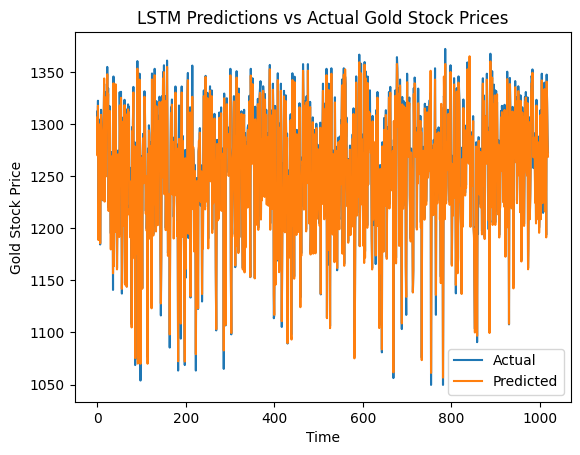

In [ ]:
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.metrics import RootMeanSquaredError

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape input data for LSTM (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

# Compile the model with RMSE as an evaluation metric
lstm_model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])

# Train the model
history = lstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
loss, rmse = lstm_model.evaluate(X_test, y_test)
print('Test Loss:', loss)
print('Test RMSE:', rmse)

# Make predictions
y_pred = lstm_model.predict(X_test)

# Inverse transform predictions to get original scale
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions vs actual values
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('LSTM Predictions vs Actual Gold Stock Prices')
plt.xlabel('Time')
plt.ylabel('Gold Stock Price')
plt.show()


## XGBoost

Prepare data for XGBoost and Linear regression

In [ ]:
# Create flat sequences
def create_flat_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        seq = data['Close'].iloc[i:i + seq_length].values
        X.append(seq)  # Treat sequence as a flat input
        y.append(data['Close'].iloc[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_flat_sequences(data, seq_length)


In [ ]:
import xgboost as xgb

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)


In [ ]:
# Training and Evaluation Function
def xgb_train(model, X_train, y_train, X_test, y_test, scaler):
    model.fit(X_train, y_train)

    # Predictions
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)

    # Calculate metrics
    train_mse = mean_squared_error(y_train, train_preds)
    test_mse = mean_squared_error(y_test, test_preds)
    train_rmse = np.sqrt(train_mse)
    test_rmse = np.sqrt(test_mse)

    print(f"Train MSE: {train_mse:.6f}, Train RMSE: {train_rmse:.6f}")
    print(f"Test MSE: {test_mse:.6f}, Test RMSE: {test_rmse:.6f}")

    # Inverse transform
    y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))
    train_preds_orig = scaler.inverse_transform(train_preds.reshape(-1, 1))
    test_preds_orig = scaler.inverse_transform(test_preds.reshape(-1, 1))

    return train_preds_orig, test_preds_orig, y_train_orig, y_test_orig


In [ ]:
def xgb_train(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    xgb_predictions = model.predict(X_test)
    xgb_train_predictions = model.predict(X_train)

    test_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
    train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_predictions))
    print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    return xgb_train_predictions, xgb_predictions

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the data for XGBoost
X_train_xgb = X_train.reshape(X_train.shape[0], -1)
X_test_xgb = X_test.reshape(X_test.shape[0], -1)

# Create and train the XGBoost regressor
gold_xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000)

gold_train_preds,gold_test_preds = xgb_train(gold_xgb_model,
                                            X_train_xgb, y_train,
                                            X_test_xgb, y_test)

Train RMSE: 0.004499129653340584, Test RMSE: 0.017502736047340848


## Linear Model (Baseline)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Assuming 'Close' is the target variable (stock price)
# Replace 'Close' with the actual column name if different
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model (you can choose other models)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (example: Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# You can further improve the model by:
# 1. Trying different regression models (e.g., RandomForestRegressor, SVR)
# 2. Feature engineering (creating new features from existing ones)
# 3. Hyperparameter tuning
# 4. Handling missing values if any


Mean Squared Error: 0.00022686277640849323


## GRU Model

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0556 - root_mean_squared_error: 0.2112 - val_loss: 6.7840e-04 - val_root_mean_squared_error: 0.0260
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 5.7443e-04 - root_mean_squared_error: 0.0240 - val_loss: 5.8006e-04 - val_root_mean_squared_error: 0.0241
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 5.5398e-04 - root_mean_squared_error: 0.0235 - val_loss: 5.4697e-04 - val_root_mean_squared_error: 0.0234
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - loss: 5.1976e-04 - root_mean_squared_error: 0.0228 - val_loss: 5.1433e-04 - val_root_mean_squared_error: 0.0227
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 5.1118e-04 - root_mean_squared_error: 0.0226 - val_loss: 5.1169e-04 - val_root_mean_squared_error: 0.0226
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 5.1750e-04 - root_mean_squared_error: 0.0227 - val_loss: 4.9606e-04 - val_root_mean_squared_error: 0.0223
Epoch 7/50
12

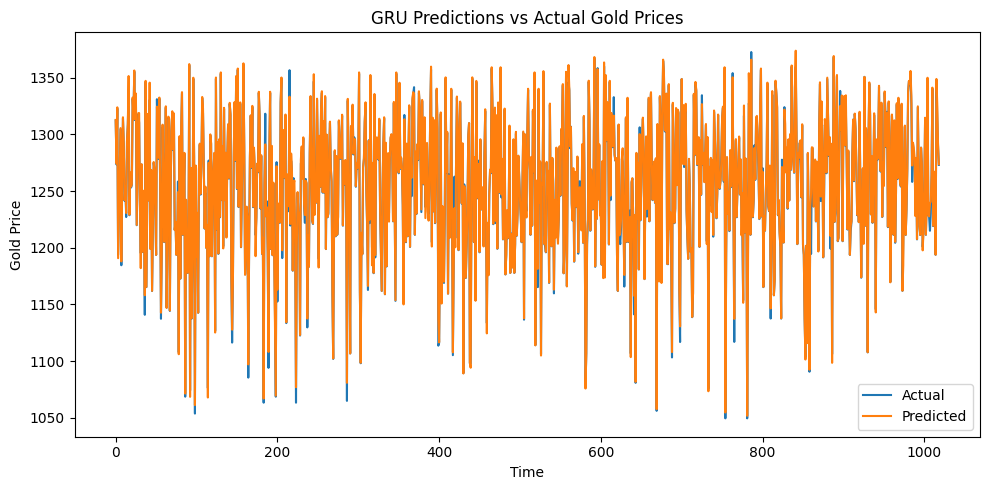

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.metrics import RootMeanSquaredError

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Reshape for GRU: (samples, timesteps, features)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

#  Build GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
gru_model.add(GRU(units=50))
gru_model.add(Dense(1))

gru_model.compile(loss='mean_squared_error', optimizer='adam', metrics=[RootMeanSquaredError()])

#  Train
history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

#  Evaluate
loss, rmse = gru_model.evaluate(X_test, y_test)
print('Test Loss (MSE):', loss)
print('Test RMSE:', rmse)

#  Predict & inverse transform
y_pred = gru_model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)
y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(y_test_orig, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.title('GRU Predictions vs Actual Gold Prices')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.tight_layout()
plt.show()

## Bi-LSTM Model

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - loss: 0.0519 - root_mean_squared_error: 0.2035 - val_loss: 9.1851e-04 - val_root_mean_squared_error: 0.0303
Epoch 2/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - loss: 8.7530e-04 - root_mean_squared_error: 0.0296 - val_loss: 9.4491e-04 - val_root_mean_squared_error: 0.0307
Epoch 3/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 8.7512e-04 - root_mean_squared_error: 0.0296 - val_loss: 8.4670e-04 - val_root_mean_squared_error: 0.0291
Epoch 4/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - loss: 7.9239e-04 - root_mean_squared_error: 0.0281 - val_loss: 7.9637e-04 - val_root_mean_squared_error: 0.0282
Epoch 5/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 5s 21ms/step - loss: 8.0430e-04 - root_mean_squared_error: 0.0283 - val_loss: 7.5522e-04 - val_root_mean_squared_error: 0.0275
Epoch 6/50
128/128 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 7.7129e-04 - root_mean_squared_error: 0.0278 - val_loss: 7.5787e-04 - val_root_mean_squared_error: 0.0275
Epoch 7/50
1

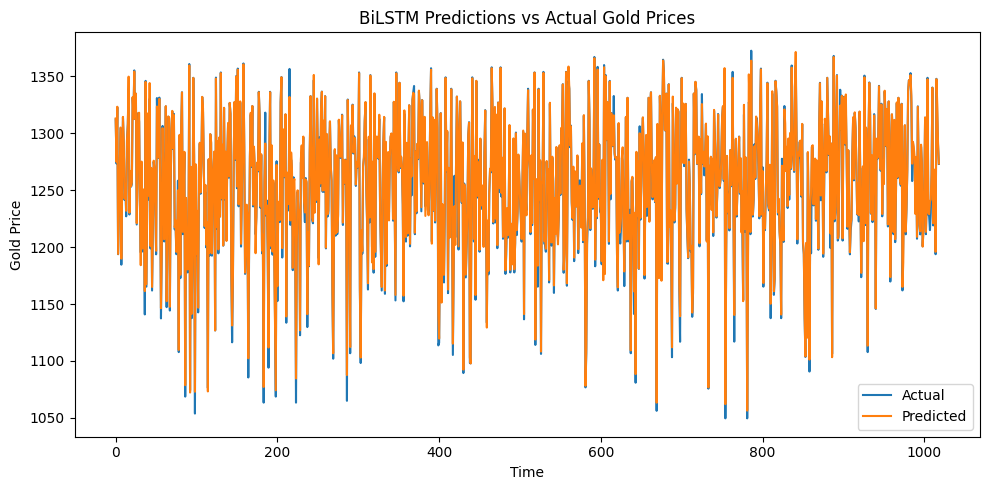

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense
from tensorflow.keras.metrics import RootMeanSquaredError

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape for BiLSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build BiLSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(units=50, return_sequences=True), input_shape=(seq_length, 1)))
bilstm_model.add(Bidirectional(LSTM(units=50)))
bilstm_model.add(Dense(1))

# Compile model with RMSE
bilstm_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# Train model
history = bilstm_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Evaluate model
loss, rmse = bilstm_model.evaluate(X_test, y_test)
print(f"Test MSE: {loss}")
print(f"Test RMSE: {rmse}")

# Predict and inverse transform
y_pred = bilstm_model.predict(X_test)
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test.reshape(-1, 1))

# Plot predictions
plt.figure(figsize=(10, 5))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred_original, label='Predicted')
plt.title('BiLSTM Predictions vs Actual Gold Prices')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.tight_layout()
plt.show()

## CNN Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Reshape input data to fit Conv1D: (samples, timesteps, features)
# We'll treat each feature as a timestep for 1D convolution
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[2], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[2], 1)

# Build CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))  # Output layer for regression

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32)

# Evaluate the model
loss = cnn_model.evaluate(X_test_cnn, y_test)
print(f"Mean Squared Error: {loss}")

# Make predictions
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_original_cnn = scaler.inverse_transform(y_pred_cnn)
y_test_original_cnn = scaler.inverse_transform(y_test)


ValueError: cannot reshape array of size 40750 into shape (4075,1,1)

# Independent Dataframe

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahilwagh/gold-stock-prices")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/sahilwagh/gold-stock-prices/versions/3


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
sns.set_style("whitegrid")
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 20
pd.options.display.max_rows = 20
pd.options.display.max_colwidth = 80
np.set_printoptions(precision = 4, suppress = True)

In [ ]:
df = pd.read_csv(os.path.join(path, "goldstock v1.csv"))
df.head()

,Unnamed: 0,Date,Close,Volume,Open,High,Low
0,0,2024-01-19,2029.3,166078.0,2027.4,2041.9,2022.2
1,1,2024-01-18,2021.6,167013.0,2009.1,2025.6,2007.7
2,2,2024-01-17,2006.5,245194.0,2031.7,2036.1,2004.6
3,3,2024-01-16,2030.2,277995.0,2053.4,2062.8,2027.6
4,4,2024-01-12,2051.6,250946.0,2033.2,2067.3,2033.1


In [ ]:
if 'Unnamed: 0' in df.columns:
    df.drop(columns=['Unnamed: 0'], inplace=True)
df = df[::-1].reset_index().drop(columns=['index'])
df.head(10)

,Date,Close,Volume,Open,High,Low
0,2014-01-22,1238.6,80262.0,1240.5,1243.5,1235.5
1,2014-01-23,1262.5,41697.0,1235.1,1267.1,1230.8
2,2014-01-24,1264.5,34998.0,1264.3,1273.2,1256.9
3,2014-01-27,1263.5,63419.0,1269.9,1280.1,1252.0
4,2014-01-28,1250.5,81426.0,1254.9,1261.9,1248.0
5,2014-01-29,1262.2,115459.0,1255.8,1270.7,1248.3
6,2014-01-30,1242.5,155053.0,1267.2,1267.8,1237.5
7,2014-01-31,1239.8,111168.0,1244.0,1254.8,1238.2
8,2014-02-03,1259.9,120942.0,1242.0,1266.1,1240.4
9,2014-02-04,1251.2,86988.0,1257.9,1260.7,1246.8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2511 non-null   object 
 1   Close   2511 non-null   float64
 2   Volume  2511 non-null   float64
 3   Open    2511 non-null   float64
 4   High    2511 non-null   float64
 5   Low     2511 non-null   float64
dtypes: float64(5), object(1)
memory usage: 117.8+ KB


In [ ]:
def create_sequences(df, sequence_length, target_length,
                     features, target_attrs):
    sequences = []
    targets = []
    for i in range(len(df) - sequence_length - target_length + 1):
        sequence = df[features].iloc[i:i + sequence_length]
        target = df[target_attrs].iloc[i + sequence_length:i + sequence_length + target_length]
        sequences.append(sequence)
        targets.append(target)
    return np.array(sequences), np.array(targets)

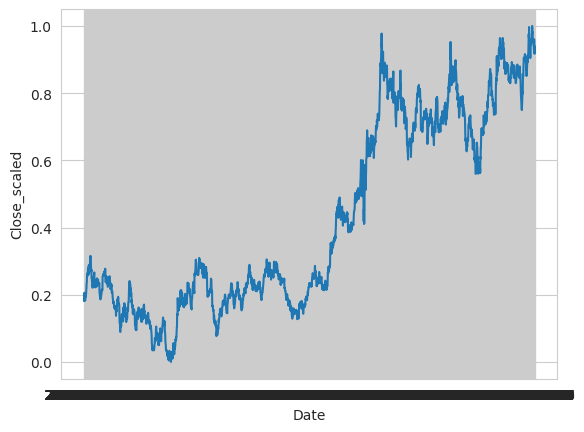

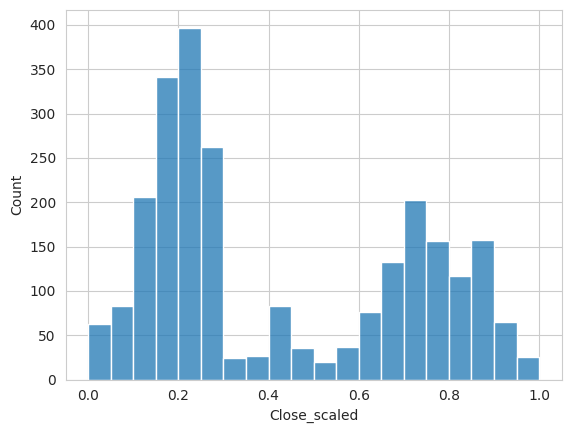

In [ ]:
from sklearn.preprocessing import MinMaxScaler

gold_scaler = MinMaxScaler(feature_range=(0,1))
df['Close_scaled'] = gold_scaler.fit_transform(df[['Close']])

sns.lineplot(data=df, x='Date', y='Close_scaled')
plt.show()
sns.histplot(data=df, x='Close_scaled', bins=20)
plt.show()

In [ ]:
seq_length = 10
forecast_length = 1
target = ['Close_scaled']
features = ['Close_scaled']
X, y = create_sequences(df, seq_length, 1, target, features)

y = np.squeeze(y, 1)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (2501, 10, 1)
Shape of y: (2501, 1)


In [ ]:
from sklearn.model_selection import train_test_split
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.35,
                                                    random_state=42,
                                                    shuffle=False)

print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).to(device)

print("Shape of X_train_tensor:", X_train_tensor.shape)
print("Shape of y_train_tensor:", y_train_tensor.shape)
print("Shape of X_test_tensor:", X_test_tensor.shape)
print("Shape of y_test_tensor:", y_test_tensor.shape)

Shape of X_train: (1625, 10, 1)
Shape of y_train: (1625, 1)
Shape of X_test: (876, 10, 1)
Shape of y_test: (876, 1)
Shape of X_train_tensor: torch.Size([1625, 10, 1])
Shape of y_train_tensor: torch.Size([1625, 1])
Shape of X_test_tensor: torch.Size([876, 10, 1])
Shape of y_test_tensor: torch.Size([876, 1])


## LSTM

In [ ]:
import torch.nn as nn
def lstm_training(model: nn.Module,
                  criterion,
                  optimizer,
                  X_train_tensor: torch.Tensor,
                  y_train_tensor: torch.Tensor,
                  X_test_tensor: torch.Tensor,
                  y_test_tensor: torch.Tensor,
                  batch_size: int,
                  num_epochs: int) -> pd.DataFrame:
    train_losses = []
    test_losses = []


    for epoch in range(num_epochs):
        model.train()
        optimizer.zero_grad()
        train_loss = 0
        for i in range(0, len(X_train_tensor), batch_size):
            batch_X = X_train_tensor[i:i+batch_size]
            batch_y = y_train_tensor[i:i+batch_size]

            outputs = model(batch_X)
            loss = criterion(outputs, batch_y)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()

        train_loss /= (len(X_train_tensor) / batch_size)
        train_losses.append(train_loss)


        model.eval()
        with torch.no_grad():
            test_loss = 0
            for i in range(0, len(X_test_tensor), batch_size):
                batch_X = X_test_tensor[i:i+batch_size]
                batch_y = y_test_tensor[i:i+batch_size]

                outputs = model(batch_X)
                test_loss += criterion(outputs, batch_y).item()


            test_loss /= (len(X_test_tensor) / batch_size)
            test_losses.append(test_loss)


        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}")

    results_df = pd.DataFrame({
        'epoch': np.arange(1, num_epochs+1),
        'train_loss': np.array(train_losses),
        'test_loss': np.array(test_losses)
    })

    return results_df

def lstm_predict(model,prices,scaler = None):
    X = prices.reshape(1,-1)
    X = torch.tensor(X).type(torch.float32).to(device)
    X = X.unsqueeze(2)

    model.eval()
    with torch.no_grad():
        y = model(X)

    X = X.squeeze(2)
    if scaler is not None:
        X = scaler.inverse_transform(X.cpu().numpy())
        y = scaler.inverse_transform(y.cpu().numpy())

    return X[0], y[0][0]

In [ ]:
class GoldLSTMModel(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers, output_size, dropout):
      super(GoldLSTMModel, self).__init__()

      self.lstm = nn.LSTM(input_size, hidden_size, num_layers,
                          batch_first=True, dropout=dropout)
      self.fc = nn.Sequential(
          nn.ReLU(),
          nn.Linear(hidden_size, output_size),
      )

  def forward(self, x):
      out, _ = self.lstm(x)
      out = self.fc(out[:, -1, :])
      return out

In [ ]:
# Define hyperparameters

input_size = 1
hidden_size = 128  # Increased for better learning capacity
num_layers = 2  # Using multiple layers to benefit from dropout
output_size = 1
learning_rate = 0.001
num_epochs = 100
batch_size = 16
dropout = 0.2  # Enabled dropout since num_layers > 1

gold_lstm_model = GoldLSTMModel(input_size, hidden_size,
                            num_layers, output_size, dropout).to(device)
criterion = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(gold_lstm_model.parameters(), lr=learning_rate)

In [ ]:
gold_lstm_results = lstm_training(gold_lstm_model,criterion,
                                  optimizer,X_train_tensor,
                                  y_train_tensor, X_test_tensor,
                                  y_test_tensor,batch_size,num_epochs)

Epoch [1/100], Loss: 0.0450, Test Loss: 0.2033
Epoch [2/100], Loss: 0.0217, Test Loss: 0.0257
Epoch [3/100], Loss: 0.0315, Test Loss: 0.0178
Epoch [4/100], Loss: 0.0313, Test Loss: 0.0115
Epoch [5/100], Loss: 0.0735, Test Loss: 0.1879
Epoch [6/100], Loss: 0.0644, Test Loss: 0.5726
Epoch [7/100], Loss: 0.0220, Test Loss: 0.2376
Epoch [8/100], Loss: 0.0443, Test Loss: 0.4750
Epoch [9/100], Loss: 0.0249, Test Loss: 0.3039
Epoch [10/100], Loss: 0.0323, Test Loss: 0.4158
Epoch [11/100], Loss: 0.0239, Test Loss: 0.3340
Epoch [12/100], Loss: 0.0292, Test Loss: 0.3989
Epoch [13/100], Loss: 0.0241, Test Loss: 0.3437
Epoch [14/100], Loss: 0.0288, Test Loss: 0.3955
Epoch [15/100], Loss: 0.0242, Test Loss: 0.3454
Epoch [16/100], Loss: 0.0293, Test Loss: 0.3987
Epoch [17/100], Loss: 0.0240, Test Loss: 0.3415
Epoch [18/100], Loss: 0.0306, Test Loss: 0.4081
Epoch [19/100], Loss: 0.0232, Test Loss: 0.3309
Epoch [20/100], Loss: 0.0329, Test Loss: 0.4264
Epoch [21/100], Loss: 0.0217, Test Loss: 0.3107
E

In [ ]:
def plot_predictions(original,predictions, figsize=(12,6)):
    plt.figure(figsize=figsize)
    plt.plot(original, label="Original")
    plt.plot(predictions, label="Predicted")
    plt.ylabel("Prediction")
    plt.title("Predictions")
    plt.legend()
    plt.show()

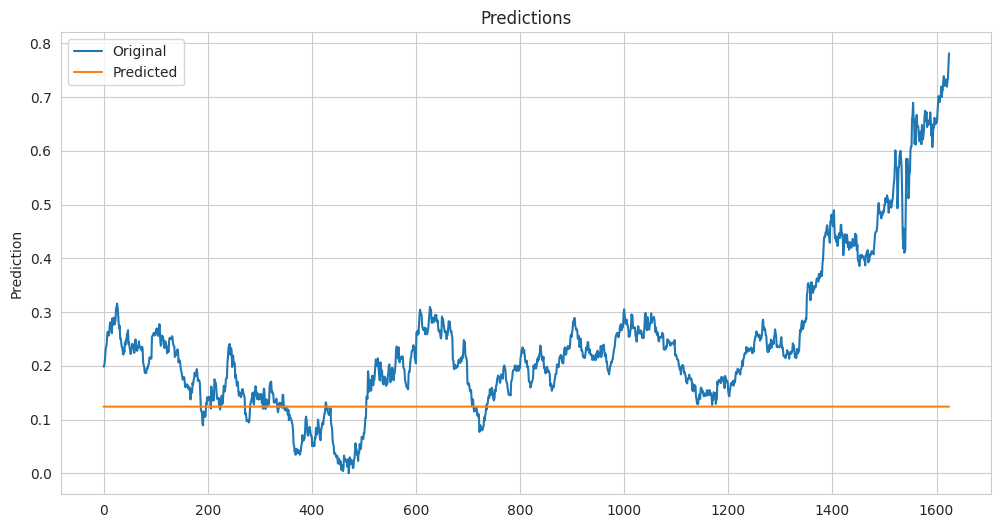

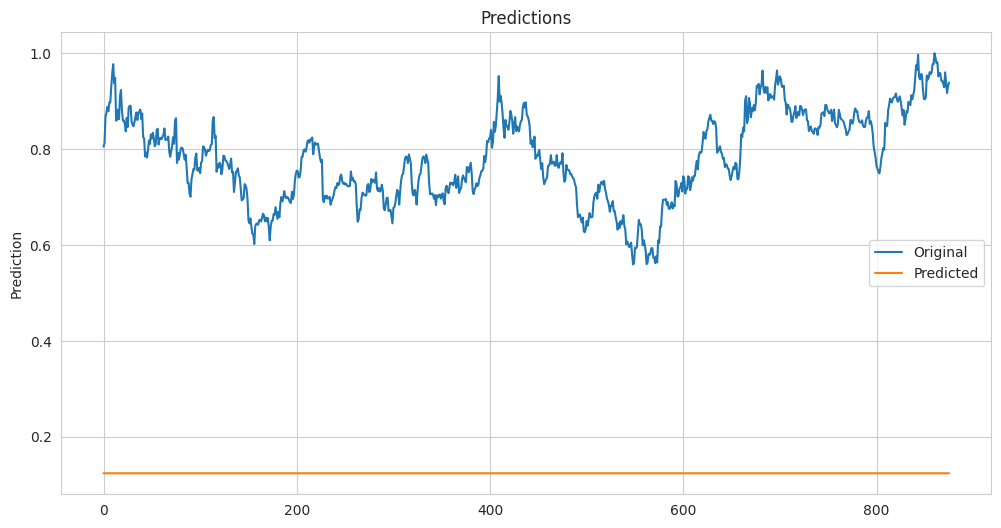

In [ ]:
gold_lstm_model.eval()

with torch.no_grad():
    train_predictions = gold_lstm_model(X_train_tensor)
    test_predictions = gold_lstm_model(X_test_tensor)


plot_predictions(y_train, train_predictions)
plot_predictions(y_test, test_predictions.cpu().numpy())

In [ ]:
rmse_LSTM = np.sqrt(np.mean((y_test - y_pred) ** 2))
print(f"Test RMSE: {rmse_LSTM:.4f}")

## XGBoost


In [ ]:
import xgboost as xgb
def xgb_train(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    xgb_predictions = model.predict(X_test)
    xgb_train_predictions = model.predict(X_train)

    test_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
    train_rmse = np.sqrt(mean_squared_error(y_train, xgb_train_predictions))
    print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    return xgb_train_predictions, xgb_predictions

def xgb_predict(model, prices, scaler = None):
    X = prices.reshape(1, -1)
    y = model.predict(X).reshape(-1,1)

    if scaler is not None:
        X = scaler.inverse_transform(X)
        y = scaler.inverse_transform(y)

    return X[0], y[0][0]

In [ ]:
# Reshape the data for XGBoost
X_train_xgb = X_train.reshape(X_train.shape[0], -1)
X_test_xgb = X_test.reshape(X_test.shape[0], -1)

# Create and train the XGBoost regressor
gold_xgb_model = xgb.XGBRegressor(objective='reg:squarederror',
                                  n_estimators=1000,
                                  learning_rate=0.01,  # Reduce learning rate
                                  max_depth=6,         # Increase depth
                                  min_child_weight=3,   # Reduce overfitting
                                  colsample_bytree=0.8)

gold_train_preds,gold_test_preds = xgb_train(gold_xgb_model,
                                            X_train_xgb, y_train,
                                            X_test_xgb, y_test)

In [ ]:
plot_predictions(y_train, gold_train_preds)
plot_predictions(y_test, gold_test_preds)

In [ ]:
test_rmse = np.sqrt(mean_squared_error(y_test, gold_test_preds))
print(f"Test RMSE: {test_rmse}")

## Linear Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from

X = df.drop(['Close', 'Date'], axis=1)
y = df['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train a linear regression model (you can choose other models)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model (example: Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f"Root Mean Squared Error: {sqrt(mse)}")

## GRU Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler

X_train_gru = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_gru = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# 6. Build GRU model
gru_model = Sequential()
gru_model.add(GRU(units=50, return_sequences=True, input_shape=(seq_length, 1)))
gru_model.add(GRU(units=50, return_sequences=False))
gru_model.add(Dense(1))

gru_model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError()])

# 7. Train the model
history = gru_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# 8. Evaluate model
loss, rmse = gru_model.evaluate(X_test, y_test)
print(f"Test MSE: {loss}")
print(f"Test RMSE: {rmse}")

# 9. Predict and inverse transform
y_pred = gru_model.predict(X_test)
y_pred_original = y_scaler.inverse_transform(y_pred)
y_test_original = y_scaler.inverse_transform(y_test.reshape(-1, 1))

# 10. Plot results
plt.figure(figsize=(10, 5))
plt.plot(y_test_original, label='Actual')
plt.plot(y_pred_original, label='Predicted')
plt.title('GRU Predictions vs Actual Gold Prices')
plt.xlabel('Time')
plt.ylabel('Gold Price')
plt.legend()
plt.tight_layout()
plt.show()

## Bi-LSTM

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Bidirectional, LSTM, Dense

# Prepare the data for the BiLSTM model
X = df.drop(['Close', 'Date'], axis=1)
y = df['Close']

# Scale the features using MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape the input data for the BiLSTM model
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])  # Reshape to (samples, timesteps, features)
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])


# Build the BiLSTM model
model = Sequential()
model.add(Bidirectional(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2]))))
model.add(Bidirectional(LSTM(units=50)))
model.add(Dense(units=1)) # Output layer with one neuron for regression

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32) # Adjust epochs and batch size as needed


# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f"Mean Squared Error: {loss}")

# Make predictions (remember to inverse_transform to get the original scale)
y_pred = model.predict(X_test)
y_pred_original = scaler.inverse_transform(y_pred)
y_test_original = scaler.inverse_transform(y_test)

## CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Reshape input data to fit Conv1D: (samples, timesteps, features)
# We'll treat each feature as a timestep for 1D convolution
X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[2], 1)
X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[2], 1)

# Build CNN model
cnn_model = Sequential()
cnn_model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(pool_size=2))
cnn_model.add(Dropout(0.2))
cnn_model.add(Flatten())
cnn_model.add(Dense(50, activation='relu'))
cnn_model.add(Dense(1))  # Output layer for regression

# Compile the model
cnn_model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
cnn_model.fit(X_train_cnn, y_train, epochs=50, batch_size=32)

# Evaluate the model
loss = cnn_model.evaluate(X_test_cnn, y_test)
print(f"Mean Squared Error: {loss}")

# Make predictions
y_pred_cnn = cnn_model.predict(X_test_cnn)
y_pred_original_cnn = scaler.inverse_transform(y_pred_cnn)
y_test_original_cnn = scaler.inverse_transform(y_test)